
# Alzheimer Detection and Classifier


## 1. Problem Definition
> Alzheimer is known the most for the causes of dementia. It takes 2/3 of the whole dementia popilation, while the cause is still unknown. According to papers from Lancet neurology, even the old theory such as neural inflations, which was disregarded as the cause compared to tau-protein, beta-amiloids, and genetic factors (Apo E4). 

Before I start, I'll have to explain a bit more about the Alzheimer, because, the data contains 4 classes of Alzheimer that depends on the severity of dementia. 

There are degrees of severity in Alzheimer. 
1. Very mildly demented : This is the stage where patient starts to forget where they put their stuff, other people's names recently, etc. It is hard to detect through cognitive ability test. 

2. Mildly demented : This is the stage where patients don't remember the words, can't find their way to the destination, loss of focus and work-abilities. This is also the stage where patients even forget that they are losing memory. From this stage, with cognitive testing, it can be found. 

3. Moderately demented : Starts to forget the recent activities, important old histories, have hard time calculating the budget, hard to go outside alone, and loss of empathy. 

There are 3 more stages in the moderately dementia, which in the terminal stage, the patient can't move on their own, while they lose the ability to speak. But I assume that the current dataset from Kaggle [https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset] is considering all the these stages merged inside 'Moderately demeted' or not even considered. 

Knowing these stages are important because the faster the stage the patient is at, the treatment will have higher effect in terms of slowing the process. If the dementia is found during the moderately demented stage, it is known that the patient will pass away in 3 years. (One of the reported case is a rythm guitarists Malcom from the band AC/DC was diagnosed severe dementia at 2014.)

Thus, having an AI that detects alzheimer dementia in the early stage can allow longer life expactancy from the patient as well as higher life quality overall from the slowdown of dementia. 

As Alzheimer can not only be found with cognitive ability testing, but also through MRI or CT by looking at the ventricles of the brain and cortical atrophy, the theoratical foundation on this project is solid. Doctors find the patient with Alzheimer's have a brain that have enlarged ventricles (that lies in the center of the brain) as well as thinner cortical grey area of the brain.  

## 2. Solution Specification
This project will go through various ML models from basic (Principle Component Analysis(PCA), Linear Discriminant Analysis(LDA), Support Vector Machine with 3 different kernels starting with linear to rbf kernel, and finally Convolutional Neural Network models VGG16 for Detection and EfficientNetB0 for Classification) and see which type works the best. 

This project will contain 2 main sections. Alzheimer Detection and Alzheimer Classification. Detection models (PCA, SVM, LDA, VGG16) will be making judgements about the test data to see whether this person's brain image shows Alzheimer signs. 

On the other hand, Alzheimer Classification will be done through training the data with different severity for Alzheimer. Actually, this is how the original data is made, and this model can be used as a detector as well. As ML model will provide what stage the patient is, it may be used as a supportive tool for doctors to diagnose Alzheimer's Disease. It brings some light in the practical world as it may find early stages of AD, which can increase life expectancy as well as increased life quality with supportive treatments. 

Summary: I will try to implement diverse models for Alzheimer detection(non vs with alzheimer) as well as Alzheimer Classifier(non vs very mild vs mild vs moderate)

Prepare the data in 2 different ways. 
1. Alzheimer Detection: Whether the patient has the alzhiemer or not (non vs all other categories) 
2. Alzheimer Classifier: Define what stage the patient is in the alzheimer. 

The models that are going to be tested here are 
1. PCA for Alzheimer Detection
2. LDA for Alzheimer Detection
3. SVM for Alzheimer Detection and Alzheimer Classifier
4. CNN for Alzheimer Detection(VGG16) and Alzheimer Classifier(EfficientNetB0)

In [2]:
#Set up the environment and upload the data
from sklearn.preprocessing import StandardScaler
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics #confusion_matrix, accuracy_score
from time import sleep 
from tqdm.notebook import tqdm
import os
import cv2
sns.set()

In [3]:
#Dataset that should go with Alzheimer label
very_mild = glob(r'C:\Users\Student\Downloads\alz\Dataset\Very_Mild_Demented\*')
mild = glob(r'C:\Users\Student\Downloads\alz\Dataset\Mild_Demented\*')
moderate = glob(r'C:\Users\Student\Downloads\alz\Dataset\Moderate_Demented\*')

#Dataset without Alzheimer
non = glob(r'C:\Users\Student\Downloads\alz\Dataset\Non_Demented\*')

C:\Users\Student\Downloads\alz\Dataset\Non_Demented\non_10.jpg
One of the data in Non Alzheimer Folder
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

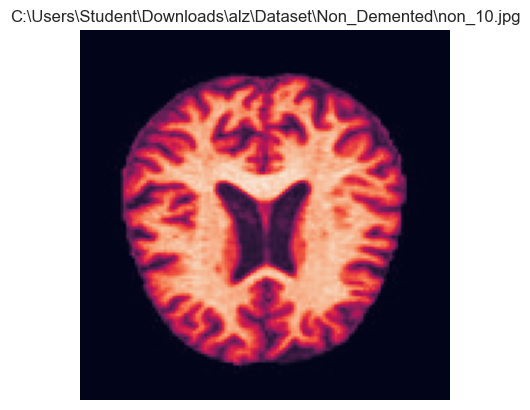

In [8]:
print(non[1])
def view_image(directory):
    img = mpimg.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img

print('One of the data in Non Alzheimer Folder')
view_image(non[1])

Alzheimer Patient's Brain
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

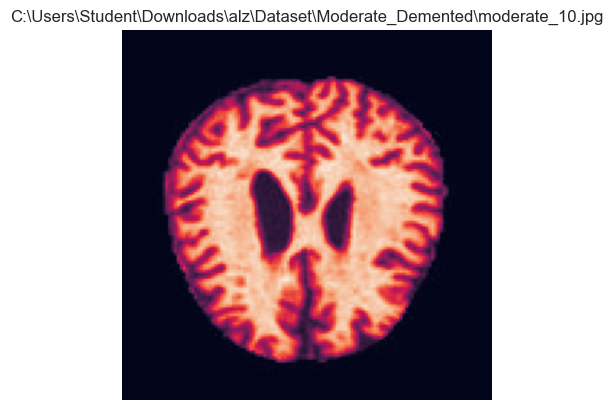

In [5]:
print('Alzheimer Patient\'s Brain')
view_image(moderate[1])

## 3. Testing and Analysis
## 3.1 Alzheimer Detection Models
### PCA for Alzheimer Detection

Number of components explaining 80% variance: 175
[[ -6.77107777  12.96987557   2.10618496 ...   1.42287829  -0.11868636
   -1.34549537]
 [-15.35822406 -12.57707845   2.84098939 ...   0.61969328   0.21211266
   -1.1609399 ]
 [-10.0354223    5.77143417  20.28382259 ...   0.8774552    0.28913628
    0.35496552]
 ...
 [ -2.2249959    8.98296861 -15.06894083 ...  -0.42521835   0.22342541
    0.38151424]
 [ 17.92085431   5.67535507   1.33923608 ...   0.58564874  -1.01773613
   -0.08710799]
 [  7.35238929   5.64658109  -3.52839906 ...   0.10835922   1.80105559
   -0.93459755]]


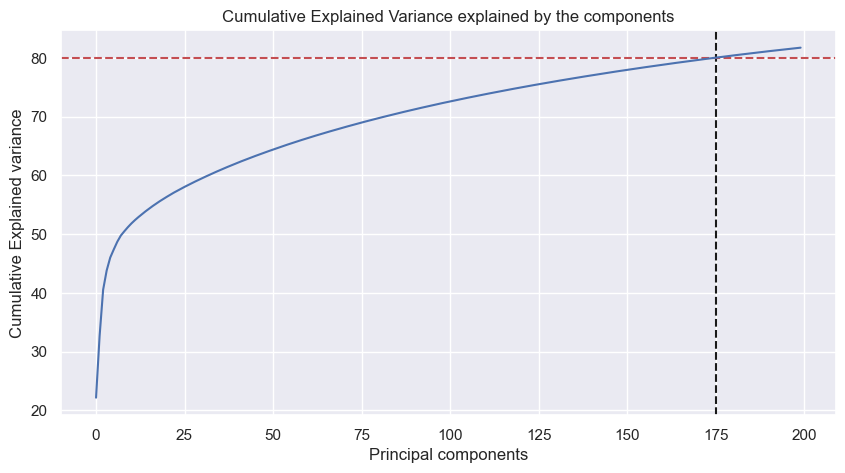

In [6]:
def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img / 255.0  # normalize pixel values
    img = resize(img, (128, 128, 3))  # convert all images to (128x128x3)
    img = np.reshape(img, (128, 384))
    return img

non_ALZ = [extract_feature(filename) for filename in non]
vmild_ALZ = [extract_feature(filename) for filename in very_mild]
mild_ALZ = [extract_feature(filename) for filename in mild]
moderate_ALZ = [extract_feature(filename) for filename in moderate]
ALZ = vmild_ALZ + mild_ALZ + moderate_ALZ

#for PCA
all_data = np.concatenate((np.array(non_ALZ),np.array(ALZ)))
#print(all_data)
all_data = all_data.reshape(all_data.shape[0], np.product(all_data.shape[1:]))

scaler = StandardScaler()
scaler.fit(all_data)

#standardize data to 0 mean and unit variance
X = scaler.transform(all_data)

#split the data 
from sklearn.model_selection import train_test_split
y = [0] * len(non_ALZ) + [1] * len(ALZ)
X_train, X_test, y_train, y_test = train_test_split(all_data, y, test_size=0.2)

scala = preprocessing.StandardScaler()
#Compressing the images into two dimensions using PCA
pca = decomposition.PCA(200)
X_proj = pca.fit_transform(X_train)

#let's first see which principal component works better
#scree plot but cumulative
# Getting the cumulative variance 
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100 #100 is multiplied for percentage
 
# How many PCs explain 90% of the variance?
k = np.argmax(var_cumu>80)
print("Number of components explaining 80% variance: "+ str(k)) #I guess, I will have to use 160 axis
#print("\n")
 
plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=80, color="r", linestyle="--")
ax = plt.plot(var_cumu)

print(X_proj)

From looking at the above, PCA will differentiate the dataset into two, a brain suffering from alzheimer or not. However, to have at least 80% accuracy of differentiation, it requires 175 principal components. This means that to differentiate the data with 80% accuracy, we will need to make a model that has 175 different axis in the data.

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train_LDA = lda.fit_transform(X_train, y_train)
X_test_LDA = lda.transform(X_test)
accuracy = lda.score(X_test, y_test)
print(accuracy*100, '% accuracy (testing data)' )
accuracy_train = lda.score(X_train, y_train)
print(accuracy_train*100, '% accuracy (training data)')

90.625 % accuracy (testing data)
99.98046875 % accuracy (training data)


First time when I saw the performance of the LDA(Linear Discriminant Analysis) model, I was suprised to see the performance of the model on the training data is so high. as well as the performance on the testing data is also significant. This gave me a lot of confidence about the data as it seems to be very well taken with MRI. 

### SVM for Alzheimer Detection

In [13]:
#List where arrays shall be stored
resized_image_array=[]
#List that will store the answer if an image is female (0) or male (1)
resized_image_array_label=[]

width = 256
height = 256
new_size = (width,height) #the data is just black to white 

#Iterate over pictures and resize them to 256 by 256
def resizer(image_directory):
    for file in image_directory: #tried with os.listdir but could work with os.walk as well
        img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting. 
        #preserve aspect ratio
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        else:
            resized_image_array_label.append(1)

ALZ = very_mild + mild + moderate
resizer(non)
resizer(ALZ)



In [14]:
print(len(non))
print(len(ALZ)) #data are well transformed. Let's conduct SVM
print(len(resized_image_array))
print(resized_image_array[1])

#split the data to test and training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)


3200
3200
6400
[0 0 0 ... 0 0 0]


In [ ]:
#train SVM model
#from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(train_x, train_y)
#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) #The training seems to be done with high accuracy on training data.

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) #Having high training data accuracy might mean that it is having some overfitting

In [ ]:
#Train a SVM using polynomial kernel with degree of 2
clf = svm.SVC(kernel = 'poly', degree = 2)
clf.fit(train_x, train_y)

#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

In [ ]:
#Train a SVM using RBF kernel
clf = svm.SVC(kernel = 'rbf')
clf.fit(train_x, train_y)

#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

Already from the SVM's linear kernel, the performance of the model is very promising. Considering that this model is not those of so-what-called 'State-of-the-Art', it still has a stellar performance. 

Suprisingly, as the kernel gets more complex, the overall performance does not necessarily rises. This may be the reason that 'having Alzheimer' or not is very easy to distinguish by looking at the thickness of the grey mater and the size of the ventricles. Which does not require some complex kernel tricks to be made. 

However, at this point, it is just 'Alzheimer detector' not 'Alzheimer classifier' as the original data is categorical variable. So, when I start conducting the Alzheimer classifier, more complex kernel may be better rather than a simple linear kernel trick.

### VGG16 (CNN) for Alzheimer Detection
VGG16 is known to take RGB colored data as the input for the model. However, the MRI images are in greyscale. So, I had to research on how to make the grayscale data to multi-channel before I feed it to VGG16. 
Reference for this greyscale data : 
1. https://forums.fast.ai/t/black-and-white-images-on-vgg16/2479 
2. https://forums.fast.ai/t/using-vgg-with-greyscale-images/854
3. https://github.com/keras-team/keras/issues/11208

In [ ]:
#pip install opencv-python

In [10]:
#This code cell is a revised version of Code snippet for pre-processing mnist data:https://github.com/keras-team/keras/issues/11208
#The above code is revised for this project's purpose. 
import cv2
dim = (128, 128) #original shape of the image

def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img / 255.0  # normalize pixel values
    img = resize(img, (128, 128, 3))  # convert all images to (128x128x3)
    img = np.reshape(img, (128, 384))
    return img

non_ALZ = [extract_feature(filename) for filename in non]
vmild_ALZ = [extract_feature(filename) for filename in very_mild]
mild_ALZ = [extract_feature(filename) for filename in mild]
moderate_ALZ = [extract_feature(filename) for filename in moderate]
ALZ = vmild_ALZ + mild_ALZ + moderate_ALZ

#for PCA
all_data = np.concatenate((np.array(non_ALZ),np.array(ALZ)))
#print(all_data)
all_data = all_data.reshape(all_data.shape[0], np.product(all_data.shape[1:]))

scaler = StandardScaler()
scaler.fit(all_data)

#standardize data to 0 mean and unit variance
X = scaler.transform(all_data)

#split the data 
from sklearn.model_selection import train_test_split
y = [0] * len(non_ALZ) + [1] * len(ALZ)
X_train, X_test, y_train, y_test = train_test_split(all_data, y, test_size=0.2)

#convert grayscale to 128x128 rgb channels
def to_rgb(img):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

rgb_list = []
#convert X_train data to 128x128 rgb values
for i in range(len(X_train)):
    rgb = to_rgb(X_train[i])
    rgb_list.append(rgb)
    #print(rgb.shape)
    
rgb_arr = np.stack([rgb_list],axis=4)
rgb_arr_to_3d = np.squeeze(rgb_arr, axis=4)
print(rgb_arr_to_3d.shape)

(5120, 128, 128, 3)


In [11]:

rgb_list_test = []
#convert X_test data to 128x128 rgb values
for i in range(len(X_test)):
    rgb = to_rgb(X_test[i])
    rgb_list_test.append(rgb)
    #print(rgb.shape)
    
rgb_arr_test = np.stack([rgb_list_test],axis=4)
rgb_arr_to_3d_test = np.squeeze(rgb_arr_test, axis=4)
print(rgb_arr_to_3d_test.shape)

(1280, 128, 128, 3)


In [12]:
#set up the environment
import keras
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Input, Dropout
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image

vgg16 = VGG16(weights = 'imagenet', input_shape = (128, 128, 3), include_top = False)
vgg16.summary()

vgg16.trainable = False
final_model = Sequential()
final_model.add(vgg16)
final_model.add(Flatten(name='flatten'))
final_model.add(Dense(2,activation = 'softmax', name = 'predictions'))
final_model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

final_model.fit(rgb_arr_to_3d, np.array(y_train).reshape(-1,1), batch_size = 7, epochs = 10, verbose = 1)
final_model.fit(rgb_arr_to_3d_test, np.array(y_test).reshape(-1,1), batch_size = 7, epochs = 10, verbose = 1)

58889256/58889256 [==============================] - 8s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

From the results, SVM with linear kernel has 98% for all performance measure on testing data. Other kernels that are more complex than this did not work well with SVM as the linear kernel. LDA on the other hand had 90% accuracy on testing data. PCA can have 80% accuracy by having 174 principle components(may change as it depends how training and testing data are split). CNN model(VGG16) suprisingly had low performance considering that it is the most complicated model that I've used for the Alzheimer Detector. 

This may be because that I've changed the greyscale to RBG(colored images) so that it fits the requirement for VGG16. (VGG16 is used for color images). Thus, making the data change might have affected the performance of VGG16. Accuracy of somewhere around 50% just means that it is not different from making random guess as there are only two choices for the AI model to decide. 'This image is a Alzheimer patient's brain' or not. 

To see if this is the issue for CNN itself or from transforming the data, I will try different model in the Alzheimer Classifier. (EfficientNetB0)

## 3.2 Alzheimer Classifier
Now is the time where we make SVM, LDA, and CNN models for Alzheimer classifier. 
### SVM for Alzheimer Classifier

In [ ]:
#List where arrays shall be stored
resized_image_array=[]
#List that will store the answer if an image is female (0) or male (1)
resized_image_array_label=[]

width = 256
height = 256
new_size = (width,height) #the data is just black to white 

#Iterate over pictures and resize them to 256 by 256
def resizer(image_directory):
    for file in image_directory: #tried with os.listdir but could work with os.walk as well
        img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting. 
        #preserve aspect ratio
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        elif image_directory == very_mild:
            resized_image_array_label.append(1)
        elif image_directory == mild:
            resized_image_array_label.append(2)
        else:
            resized_image_array_label.append(3)

resizer(non)
resizer(very_mild)
resizer(mild)
resizer(moderate)

#split the data to test and training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)

#train SVM model
#from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(train_x, train_y)
#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

In [ ]:
#Train a SVM using polynomial kernel with degree of 2
clf = svm.SVC(kernel = 'poly', degree = 2)
clf.fit(train_x, train_y)

#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))


In [ ]:
#Train a SVM using RBF kernel
clf = svm.SVC(kernel = 'rbf')
clf.fit(train_x, train_y)

#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

The above performance tells that the linear kernel still works the best for the classification as well compared to other complex kernels. Considering that kernel are used to separate the data with it's shape, the data seems to be very well separated linearly in the upper dimention. Also, the accuracy of the linear kernel SVM model is 98.67% which is higher than just Alzheimer detection model from above. 


### CNN model for Alzheimer Classifier (EfficientNetB0)
Rather than using the typical and basic models, here, I use a bit more state-of-the-art model EfficientNet. Depending on the input data's shape, EfficientNet changes a little bit. However, for the smallest shape (usual input is 224x224) EfficientNetB0 is used. 

- Reference 
1. https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/
2. https://towardsdatascience.com/neural-architecture-transfer-54226b2306e3 
3. https://towardsdatascience.com/state-of-the-art-image-classification-algorithm-fixefficientnet-l2-98b93deeb04c 

- First, see if the existing code in Kaggle is actually giving 99% accuracy with different seed. 

In [ ]:
import tensorflow as tf
#syntax from https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
data = r'C:\Users\green\Desktop\Dataset'
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data,
    labels = 'inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset="training",
    seed=42,
    color_mode='grayscale',
    image_size=(128,128),
    batch_size=32,
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    data,
    labels = 'inferred',
    label_mode='categorical',
    validation_split= 0.2,
    subset="validation",
    seed=42,
    color_mode= 'grayscale',
    image_size = (128,128),
    batch_size=32,
)

#Model setup
EffNet = tf.keras.applications.EfficientNetB0(include_top = False)
EffNet.trainable = True
inputs = tf.keras.layers.Input(shape=((128,128) + (1,)), name = 'input_layer')
x = EffNet(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs = tf.keras.layers.Dense(4, activation = 'softmax', name='output_layer')(x)
model = tf.keras.Model(inputs, outputs)
Learning_Rate = 0.1
model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = Learning_Rate), metrics=['accuracy'])
model.summary()

#Training the Model
graphs = model.fit(train_data, validation_data = test_data, epochs = 10, verbose = False)
pd.DataFrame(graphs.history).plot(figsize=(8,6))

#check the performance
model.evaluate(test_data)

Before I make judgements, I'll try with smaller learning rate. 

In [ ]:
#Model Changing the learning rate
EffNet = tf.keras.applications.EfficientNetB0(include_top = False)
EffNet.trainable = True
inputs = tf.keras.layers.Input(shape=((128,128) + (1,)), name = 'input_layer')
x = EffNet(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs = tf.keras.layers.Dense(4, activation = 'softmax', name='output_layer')(x)
model = tf.keras.Model(inputs, outputs)
Learning_Rate = 0.01
model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = Learning_Rate), metrics=['accuracy'])
model.summary()

#Training the Model
graphs = model.fit(train_data, validation_data = test_data, epochs = 10, verbose = False)
pd.DataFrame(graphs.history).plot(figsize=(8,6))

#check the performance
model.evaluate(test_data)

From the above, the performance of the existing code(https://www.kaggle.com/code/gonzalorecioc/alzheimer-brain-mri-classifier-effnetb0-99-acc) had 99% accuracy. But actually, having a different seed, the accuracy drops significantly to 58% with learning rate of 0.1 and 85% with learning rate of 0.01. No other fundamental changes in the code exists when it comes to learning rate of 0.01. 

However, since there was 99% accuracy, there should be a way to boost the accuracy to at least 90%. The reason for having low accuracy may be the issue that the shape of the given data input is 128x128 rather than 224x224, which is the input that is expected for EfficientNetB0. 

So, in below, I will resize the image and try running CNN again with the changed size. 


In [ ]:
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=True
)

testing_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=True
)

In [ ]:
#Model setup
EffNet = tf.keras.applications.EfficientNetB0(include_top = False)
EffNet.trainable = True
inputs = tf.keras.layers.Input(shape=((224,224) + (1,)), name = 'input_layer')
x = EffNet(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs = tf.keras.layers.Dense(4, activation = 'softmax', name='output_layer')(x)
model = tf.keras.Model(inputs, outputs)
Learning_Rate = 0.01
model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = Learning_Rate), metrics=['accuracy'])
model.summary()

#Training the Model
graphs = model.fit(training_dataset, validation_data = testing_dataset, epochs = 10, verbose = False)
pd.DataFrame(graphs.history).plot(figsize=(8,6))

#check the performance
model.evaluate(testing_dataset)

Overall, from the performance, this data really seems to fit well on SVM, which runs way faster than CNN. LDA also had a high accuracy as well on alzheimer detection. But considering the nature of LDA, having to see that the data is linearly separable from SVM, it shouldn't be that different with LDA as it separates data linearly as well. 

Most suprising result was tho that CNN did not work that well on my end with the high learning rate, while it does seem to have had high results in Kaggle. I don't know what is the difference in fundamental, however, the result of my CNN models including VGG16 and EfficientNetB0 sometimes were trained to have lower accuracy even compared to random guessing. This part of the project was interesting to learn why 'right sized learning rate' is important overall as it increased the accuracy significantly by more than 30%p comapred to those with bigger learning rates. 

### Overall Summary 
Having 80% accuracy and such performance on testing data is already 'good', however, in this project, there were many models that went over 90%. Here is the overall results of the model and its' performance. I highlighted the results with over 90% performance with HTML tag.

| Project | Models | Performance on test data|
| :------- | :------ | :----------- |
| Alzheimer Detection | PCA | 174 axis needed to reach 80% accuracy |
| " | SVM(Kernel:Linear) | <mark> 98% accuracy and f1 score </mark> |
| " | SVM(Kernel: 2-degree polynomial) | 86% accuracy and f1 score |
| " | SVM(Kernel:RBF) | 83% accuracy and f1 score | 
| " | LDA | <mark>90.1% accuracy</mark> |
| " | CNN(VGG16) | 50% accuracy|
| Alzheimer Classification | SVM(Kernel:Linear) | <mark>98.7% accuracy</mark> |
| " | SVM(Kernel:2-degree polynomial) | 83.1% accuracy |
| " | SVM(Kernel: RBF) | 77% accuracy |
| " | CNN(EffnetB0) - LR:0.1 | 58% accuracy |
| " | CNN(EffnetB0) - LR:0.01 | 85% accuracy |
| " | CNN(EfficientnetB0) - Resize | <mark>83% accuracy</mark> |

Having the accuracy like 90% or more may mean that they are better than human, depending on the context. And it was fun to try diverse models and improving the accuracy of ML model. I kind of got carried away with trying diverse methods :)
